In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Dropout, GlobalAveragePooling2D,
                                    MaxPooling2D, Activation, Dense, Layer)
from tensorflow.keras.datasets import cifar10
from tensorflow.compat.v2.nn import local_response_normalization as lrn
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import correlations

x_predict, y_predict = correlations.make_test_data()

Image 0
Counts:  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Image 1
Counts:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Image 2
Counts:  [0, 0, 0, 1, 0, 0, 0, 0, 2, 0]
Image 3
Counts:  [1, 0, 0, 1, 0, 0, 0, 0, 2, 0]
Image 4
Counts:  [1, 0, 0, 1, 0, 0, 1, 0, 2, 0]
Image 5
Counts:  [1, 0, 0, 1, 0, 0, 2, 0, 2, 0]
Image 6
Counts:  [1, 1, 0, 1, 0, 0, 2, 0, 2, 0]
Image 7
Counts:  [1, 1, 0, 1, 0, 0, 3, 0, 2, 0]
Image 8
Counts:  [1, 1, 0, 2, 0, 0, 3, 0, 2, 0]
Image 9
Counts:  [1, 2, 0, 2, 0, 0, 3, 0, 2, 0]
Image 10
Counts:  [2, 2, 0, 2, 0, 0, 3, 0, 2, 0]
Image 11
Counts:  [2, 2, 0, 2, 0, 0, 3, 0, 2, 1]
Image 12
Counts:  [2, 2, 0, 2, 0, 1, 3, 0, 2, 1]
Image 13
Counts:  [2, 2, 0, 2, 0, 1, 3, 1, 2, 1]
Image 14
Counts:  [2, 2, 0, 2, 0, 1, 3, 1, 2, 2]
Image 15
Counts:  [2, 2, 0, 2, 0, 1, 3, 1, 3, 2]
Image 16
Counts:  [2, 2, 0, 2, 0, 2, 3, 1, 3, 2]
Image 17
Counts:  [2, 2, 0, 2, 0, 2, 3, 2, 3, 2]
Image 18
Counts:  [2, 2, 0, 2, 0, 2, 3, 2, 4, 2]
Image 19
Counts:  [2, 2, 0, 2, 0, 2, 4, 2, 4, 2]
Image 20
Counts:  [2, 2, 0, 2,

Counts:  [73, 56, 69, 72, 64, 71, 84, 68, 80, 85]
Image 722
Counts:  [73, 56, 69, 72, 64, 71, 84, 68, 81, 85]
Image 723
Counts:  [73, 57, 69, 72, 64, 71, 84, 68, 81, 85]
Image 724
Counts:  [73, 57, 69, 72, 64, 71, 84, 68, 82, 85]
Image 725
Counts:  [73, 57, 70, 72, 64, 71, 84, 68, 82, 85]
Image 726
Counts:  [73, 58, 70, 72, 64, 71, 84, 68, 82, 85]
Image 727
Counts:  [73, 58, 70, 73, 64, 71, 84, 68, 82, 85]
Image 728
Counts:  [73, 58, 70, 73, 64, 71, 85, 68, 82, 85]
Image 729
Counts:  [73, 58, 70, 73, 64, 72, 85, 68, 82, 85]
Image 730
Counts:  [73, 58, 70, 73, 65, 72, 85, 68, 82, 85]
Image 731
Counts:  [73, 58, 71, 73, 65, 72, 85, 68, 82, 85]
Image 732
Counts:  [73, 58, 71, 73, 65, 72, 85, 69, 82, 85]
Image 733
Counts:  [73, 58, 71, 73, 65, 72, 85, 69, 82, 86]
Image 734
Counts:  [73, 58, 71, 73, 65, 72, 85, 69, 82, 87]
Image 735
Counts:  [73, 58, 71, 73, 66, 72, 85, 69, 82, 87]
Image 736
Counts:  [73, 59, 71, 73, 66, 72, 85, 69, 82, 87]
Image 737
Counts:  [73, 59, 71, 73, 67, 72, 85, 69

In [2]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten
from scipy.stats import pearsonr, spearmanr
model = load_model('Models/Primary/Version_1/all_cnn_c_0.h5')

In [8]:
layer_arr = [0, 1, 2, 3, 4, 5, 6, 7, 8]
correlations = correlations.RSA('Models/Primary/Version_1/all_cnn_c_', 10, layer_arr, x_predict)

AttributeError: module 'correlations' has no attribute 'RSA'

In [4]:
'''
RSA: Create an RDM for each activation layer (90 total) and get correlations between pairings of RDMs
'''
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten
from scipy.stats import pearsonr, spearmanr

# Function to correlate 2 RDMs
def correlate(RDM_1, RDM_2):
    print('Making correlations...')
    assert len(RDM_1) == len(RDM_2)
    num_unique_entries = 499500 # for 1000x1000
    arr_1 = np.empty((num_unique_entries))
    arr_2 = np.empty((num_unique_entries))
    counter = 0
    # first flatten all the relevant values
    for i in range(len(RDM_1)): #1000
        for j in range(i + 1, len(RDM_1)):
            arr_1[counter] = RDM_1[i, j]
            arr_2[counter] = RDM_2[i, j]
            counter += 1
    # Get Pearson correlation
    return pearsonr(arr_1, arr_2)[0]


num_images = len(x_predict) # 1000
RDM_list = np.empty((90, 1000, 1000)) #layer * instance, images, images
# Loop through network instances
for i in range(10):
    print('Working on model', str(i))
    K.clear_session()
    full_model = load_model('Models/Primary/Version_1/all_cnn_c_' + str(i) + '.h5')
    inp = full_model.input
    # Loop through layers
    for j in range(0, 9):
        print('Layer', str(j))
        out = full_model.layers[j].output
        # Flatten representation if needed
        if len(out.shape) != 2:
            out = Flatten()(out)
        temp_model = Model(inputs=inp, outputs=out)
        # Predict on x_predict, transpose for spearman
        print('Getting representation...')
        representations = temp_model.predict(x_predict).T
        print(representations.shape)
        print('Getting RDM...')
        RDM_list[10 * j + i] = spearmanr(representations, representations)[0][:num_images, :num_images]
        
print('Done gathering RDMs, now correlations')
correlations = np.empty((90, 90))
for i in range(correlations.shape[0]):
    for j in range(correlations.shape[1]):
        print('Correlation', str(i), ',', str(j))
        correlations[i, j] = correlate(RDM_list[i], RDM_list[j])

np.save('all_cnn_c_version_1_correlations.npy', correlations)
print('Done!')    
    

Working on model 0
Layer 0
Getting representation...
(98304, 1000)
Getting RDM...
Layer 1
Getting representation...
(98304, 1000)
Getting RDM...
Layer 2
Getting representation...
(24576, 1000)
Getting RDM...
Layer 3
Getting representation...
(49152, 1000)
Getting RDM...
Layer 4
Getting representation...
(49152, 1000)
Getting RDM...
Layer 5
Getting representation...
(12288, 1000)
Getting RDM...
Layer 6
Getting representation...
(12288, 1000)
Getting RDM...
Layer 7
Getting representation...
(12288, 1000)
Getting RDM...
Layer 8
Getting representation...
(640, 1000)
Getting RDM...
Working on model 1
Layer 0
Getting representation...
(98304, 1000)
Getting RDM...
Layer 1
Getting representation...
(98304, 1000)
Getting RDM...
Layer 2
Getting representation...
(24576, 1000)
Getting RDM...
Layer 3
Getting representation...
(49152, 1000)
Getting RDM...
Layer 4
Getting representation...
(49152, 1000)
Getting RDM...
Layer 5
Getting representation...
(12288, 1000)
Getting RDM...
Layer 6
Getting rep

Correlation 0 , 56
Making correlations...
Correlation 0 , 57
Making correlations...
Correlation 0 , 58
Making correlations...
Correlation 0 , 59
Making correlations...
Correlation 0 , 60
Making correlations...
Correlation 0 , 61
Making correlations...
Correlation 0 , 62
Making correlations...
Correlation 0 , 63
Making correlations...
Correlation 0 , 64
Making correlations...
Correlation 0 , 65
Making correlations...
Correlation 0 , 66
Making correlations...
Correlation 0 , 67
Making correlations...
Correlation 0 , 68
Making correlations...
Correlation 0 , 69
Making correlations...
Correlation 0 , 70
Making correlations...
Correlation 0 , 71
Making correlations...
Correlation 0 , 72
Making correlations...
Correlation 0 , 73
Making correlations...
Correlation 0 , 74
Making correlations...
Correlation 0 , 75
Making correlations...
Correlation 0 , 76
Making correlations...
Correlation 0 , 77
Making correlations...
Correlation 0 , 78
Making correlations...
Correlation 0 , 79
Making correlat

Correlation 2 , 72
Making correlations...
Correlation 2 , 73
Making correlations...
Correlation 2 , 74
Making correlations...
Correlation 2 , 75
Making correlations...
Correlation 2 , 76
Making correlations...
Correlation 2 , 77
Making correlations...
Correlation 2 , 78
Making correlations...
Correlation 2 , 79
Making correlations...
Correlation 2 , 80
Making correlations...
Correlation 2 , 81
Making correlations...
Correlation 2 , 82
Making correlations...
Correlation 2 , 83
Making correlations...
Correlation 2 , 84
Making correlations...
Correlation 2 , 85
Making correlations...
Correlation 2 , 86
Making correlations...
Correlation 2 , 87
Making correlations...
Correlation 2 , 88
Making correlations...
Correlation 2 , 89
Making correlations...
Correlation 3 , 0
Making correlations...
Correlation 3 , 1
Making correlations...
Correlation 3 , 2
Making correlations...
Correlation 3 , 3
Making correlations...
Correlation 3 , 4
Making correlations...
Correlation 3 , 5
Making correlations..

Correlation 4 , 88
Making correlations...
Correlation 4 , 89
Making correlations...
Correlation 5 , 0
Making correlations...
Correlation 5 , 1
Making correlations...
Correlation 5 , 2
Making correlations...
Correlation 5 , 3
Making correlations...
Correlation 5 , 4
Making correlations...
Correlation 5 , 5
Making correlations...
Correlation 5 , 6
Making correlations...
Correlation 5 , 7
Making correlations...
Correlation 5 , 8
Making correlations...
Correlation 5 , 9
Making correlations...
Correlation 5 , 10
Making correlations...
Correlation 5 , 11
Making correlations...
Correlation 5 , 12
Making correlations...
Correlation 5 , 13
Making correlations...
Correlation 5 , 14
Making correlations...
Correlation 5 , 15
Making correlations...
Correlation 5 , 16
Making correlations...
Correlation 5 , 17
Making correlations...
Correlation 5 , 18
Making correlations...
Correlation 5 , 19
Making correlations...
Correlation 5 , 20
Making correlations...
Correlation 5 , 21
Making correlations...
Co

Correlation 7 , 14
Making correlations...
Correlation 7 , 15
Making correlations...
Correlation 7 , 16
Making correlations...
Correlation 7 , 17
Making correlations...
Correlation 7 , 18
Making correlations...
Correlation 7 , 19
Making correlations...
Correlation 7 , 20
Making correlations...
Correlation 7 , 21
Making correlations...
Correlation 7 , 22
Making correlations...
Correlation 7 , 23
Making correlations...
Correlation 7 , 24
Making correlations...
Correlation 7 , 25
Making correlations...
Correlation 7 , 26
Making correlations...
Correlation 7 , 27
Making correlations...
Correlation 7 , 28
Making correlations...
Correlation 7 , 29
Making correlations...
Correlation 7 , 30
Making correlations...
Correlation 7 , 31
Making correlations...
Correlation 7 , 32
Making correlations...
Correlation 7 , 33
Making correlations...
Correlation 7 , 34
Making correlations...
Correlation 7 , 35
Making correlations...
Correlation 7 , 36
Making correlations...
Correlation 7 , 37
Making correlat

Correlation 9 , 30
Making correlations...
Correlation 9 , 31
Making correlations...
Correlation 9 , 32
Making correlations...
Correlation 9 , 33
Making correlations...
Correlation 9 , 34
Making correlations...
Correlation 9 , 35
Making correlations...
Correlation 9 , 36
Making correlations...
Correlation 9 , 37
Making correlations...
Correlation 9 , 38
Making correlations...
Correlation 9 , 39
Making correlations...
Correlation 9 , 40
Making correlations...
Correlation 9 , 41
Making correlations...
Correlation 9 , 42
Making correlations...
Correlation 9 , 43
Making correlations...
Correlation 9 , 44
Making correlations...
Correlation 9 , 45
Making correlations...
Correlation 9 , 46
Making correlations...
Correlation 9 , 47
Making correlations...
Correlation 9 , 48
Making correlations...
Correlation 9 , 49
Making correlations...
Correlation 9 , 50
Making correlations...
Correlation 9 , 51
Making correlations...
Correlation 9 , 52
Making correlations...
Correlation 9 , 53
Making correlat

Correlation 11 , 43
Making correlations...
Correlation 11 , 44
Making correlations...
Correlation 11 , 45
Making correlations...
Correlation 11 , 46
Making correlations...
Correlation 11 , 47
Making correlations...
Correlation 11 , 48
Making correlations...
Correlation 11 , 49
Making correlations...
Correlation 11 , 50
Making correlations...
Correlation 11 , 51
Making correlations...
Correlation 11 , 52
Making correlations...
Correlation 11 , 53
Making correlations...
Correlation 11 , 54
Making correlations...
Correlation 11 , 55
Making correlations...
Correlation 11 , 56
Making correlations...
Correlation 11 , 57
Making correlations...
Correlation 11 , 58
Making correlations...
Correlation 11 , 59
Making correlations...
Correlation 11 , 60
Making correlations...
Correlation 11 , 61
Making correlations...
Correlation 11 , 62
Making correlations...
Correlation 11 , 63
Making correlations...
Correlation 11 , 64
Making correlations...
Correlation 11 , 65
Making correlations...
Correlation

Correlation 13 , 54
Making correlations...
Correlation 13 , 55
Making correlations...
Correlation 13 , 56
Making correlations...
Correlation 13 , 57
Making correlations...
Correlation 13 , 58
Making correlations...
Correlation 13 , 59
Making correlations...
Correlation 13 , 60
Making correlations...
Correlation 13 , 61
Making correlations...
Correlation 13 , 62
Making correlations...
Correlation 13 , 63
Making correlations...
Correlation 13 , 64
Making correlations...
Correlation 13 , 65
Making correlations...
Correlation 13 , 66
Making correlations...
Correlation 13 , 67
Making correlations...
Correlation 13 , 68
Making correlations...
Correlation 13 , 69
Making correlations...
Correlation 13 , 70
Making correlations...
Correlation 13 , 71
Making correlations...
Correlation 13 , 72
Making correlations...
Correlation 13 , 73
Making correlations...
Correlation 13 , 74
Making correlations...
Correlation 13 , 75
Making correlations...
Correlation 13 , 76
Making correlations...
Correlation

Correlation 15 , 65
Making correlations...
Correlation 15 , 66
Making correlations...
Correlation 15 , 67
Making correlations...
Correlation 15 , 68
Making correlations...
Correlation 15 , 69
Making correlations...
Correlation 15 , 70
Making correlations...
Correlation 15 , 71
Making correlations...
Correlation 15 , 72
Making correlations...
Correlation 15 , 73
Making correlations...
Correlation 15 , 74
Making correlations...
Correlation 15 , 75
Making correlations...
Correlation 15 , 76
Making correlations...
Correlation 15 , 77
Making correlations...
Correlation 15 , 78
Making correlations...
Correlation 15 , 79
Making correlations...
Correlation 15 , 80
Making correlations...
Correlation 15 , 81
Making correlations...
Correlation 15 , 82
Making correlations...
Correlation 15 , 83
Making correlations...
Correlation 15 , 84
Making correlations...
Correlation 15 , 85
Making correlations...
Correlation 15 , 86
Making correlations...
Correlation 15 , 87
Making correlations...
Correlation

Correlation 17 , 76
Making correlations...
Correlation 17 , 77
Making correlations...
Correlation 17 , 78
Making correlations...
Correlation 17 , 79
Making correlations...
Correlation 17 , 80
Making correlations...
Correlation 17 , 81
Making correlations...
Correlation 17 , 82
Making correlations...
Correlation 17 , 83
Making correlations...
Correlation 17 , 84
Making correlations...
Correlation 17 , 85
Making correlations...
Correlation 17 , 86
Making correlations...
Correlation 17 , 87
Making correlations...
Correlation 17 , 88
Making correlations...
Correlation 17 , 89
Making correlations...
Correlation 18 , 0
Making correlations...
Correlation 18 , 1
Making correlations...
Correlation 18 , 2
Making correlations...
Correlation 18 , 3
Making correlations...
Correlation 18 , 4
Making correlations...
Correlation 18 , 5
Making correlations...
Correlation 18 , 6
Making correlations...
Correlation 18 , 7
Making correlations...
Correlation 18 , 8
Making correlations...
Correlation 18 , 9
M

Correlation 19 , 87
Making correlations...
Correlation 19 , 88
Making correlations...
Correlation 19 , 89
Making correlations...
Correlation 20 , 0
Making correlations...
Correlation 20 , 1
Making correlations...
Correlation 20 , 2
Making correlations...
Correlation 20 , 3
Making correlations...
Correlation 20 , 4
Making correlations...
Correlation 20 , 5
Making correlations...
Correlation 20 , 6
Making correlations...
Correlation 20 , 7
Making correlations...
Correlation 20 , 8
Making correlations...
Correlation 20 , 9
Making correlations...
Correlation 20 , 10
Making correlations...
Correlation 20 , 11
Making correlations...
Correlation 20 , 12
Making correlations...
Correlation 20 , 13
Making correlations...
Correlation 20 , 14
Making correlations...
Correlation 20 , 15
Making correlations...
Correlation 20 , 16
Making correlations...
Correlation 20 , 17
Making correlations...
Correlation 20 , 18
Making correlations...
Correlation 20 , 19
Making correlations...
Correlation 20 , 20
M

Correlation 22 , 9
Making correlations...
Correlation 22 , 10
Making correlations...
Correlation 22 , 11
Making correlations...
Correlation 22 , 12
Making correlations...
Correlation 22 , 13
Making correlations...
Correlation 22 , 14
Making correlations...
Correlation 22 , 15
Making correlations...
Correlation 22 , 16
Making correlations...
Correlation 22 , 17
Making correlations...
Correlation 22 , 18
Making correlations...
Correlation 22 , 19
Making correlations...
Correlation 22 , 20
Making correlations...
Correlation 22 , 21
Making correlations...
Correlation 22 , 22
Making correlations...
Correlation 22 , 23
Making correlations...
Correlation 22 , 24
Making correlations...
Correlation 22 , 25
Making correlations...
Correlation 22 , 26
Making correlations...
Correlation 22 , 27
Making correlations...
Correlation 22 , 28
Making correlations...
Correlation 22 , 29
Making correlations...
Correlation 22 , 30
Making correlations...
Correlation 22 , 31
Making correlations...
Correlation 

Correlation 24 , 21
Making correlations...
Correlation 24 , 22
Making correlations...
Correlation 24 , 23
Making correlations...
Correlation 24 , 24
Making correlations...
Correlation 24 , 25
Making correlations...
Correlation 24 , 26
Making correlations...
Correlation 24 , 27
Making correlations...
Correlation 24 , 28
Making correlations...
Correlation 24 , 29
Making correlations...
Correlation 24 , 30
Making correlations...
Correlation 24 , 31
Making correlations...
Correlation 24 , 32
Making correlations...
Correlation 24 , 33
Making correlations...
Correlation 24 , 34
Making correlations...
Correlation 24 , 35
Making correlations...
Correlation 24 , 36
Making correlations...
Correlation 24 , 37
Making correlations...
Correlation 24 , 38
Making correlations...
Correlation 24 , 39
Making correlations...
Correlation 24 , 40
Making correlations...
Correlation 24 , 41
Making correlations...
Correlation 24 , 42
Making correlations...
Correlation 24 , 43
Making correlations...
Correlation

Correlation 26 , 32
Making correlations...
Correlation 26 , 33
Making correlations...
Correlation 26 , 34
Making correlations...
Correlation 26 , 35
Making correlations...
Correlation 26 , 36
Making correlations...
Correlation 26 , 37
Making correlations...
Correlation 26 , 38
Making correlations...
Correlation 26 , 39
Making correlations...
Correlation 26 , 40
Making correlations...
Correlation 26 , 41
Making correlations...
Correlation 26 , 42
Making correlations...
Correlation 26 , 43
Making correlations...
Correlation 26 , 44
Making correlations...
Correlation 26 , 45
Making correlations...
Correlation 26 , 46
Making correlations...
Correlation 26 , 47
Making correlations...
Correlation 26 , 48
Making correlations...
Correlation 26 , 49
Making correlations...
Correlation 26 , 50
Making correlations...
Correlation 26 , 51
Making correlations...
Correlation 26 , 52
Making correlations...
Correlation 26 , 53
Making correlations...
Correlation 26 , 54
Making correlations...
Correlation

Correlation 28 , 43
Making correlations...
Correlation 28 , 44
Making correlations...
Correlation 28 , 45
Making correlations...
Correlation 28 , 46
Making correlations...
Correlation 28 , 47
Making correlations...
Correlation 28 , 48
Making correlations...
Correlation 28 , 49
Making correlations...
Correlation 28 , 50
Making correlations...
Correlation 28 , 51
Making correlations...
Correlation 28 , 52
Making correlations...
Correlation 28 , 53
Making correlations...
Correlation 28 , 54
Making correlations...
Correlation 28 , 55
Making correlations...
Correlation 28 , 56
Making correlations...
Correlation 28 , 57
Making correlations...
Correlation 28 , 58
Making correlations...
Correlation 28 , 59
Making correlations...
Correlation 28 , 60
Making correlations...
Correlation 28 , 61
Making correlations...
Correlation 28 , 62
Making correlations...
Correlation 28 , 63
Making correlations...
Correlation 28 , 64
Making correlations...
Correlation 28 , 65
Making correlations...
Correlation

Correlation 30 , 54
Making correlations...
Correlation 30 , 55
Making correlations...
Correlation 30 , 56
Making correlations...
Correlation 30 , 57
Making correlations...
Correlation 30 , 58
Making correlations...
Correlation 30 , 59
Making correlations...
Correlation 30 , 60
Making correlations...
Correlation 30 , 61
Making correlations...
Correlation 30 , 62
Making correlations...
Correlation 30 , 63
Making correlations...
Correlation 30 , 64
Making correlations...
Correlation 30 , 65
Making correlations...
Correlation 30 , 66
Making correlations...
Correlation 30 , 67
Making correlations...
Correlation 30 , 68
Making correlations...
Correlation 30 , 69
Making correlations...
Correlation 30 , 70
Making correlations...
Correlation 30 , 71
Making correlations...
Correlation 30 , 72
Making correlations...
Correlation 30 , 73
Making correlations...
Correlation 30 , 74
Making correlations...
Correlation 30 , 75
Making correlations...
Correlation 30 , 76
Making correlations...
Correlation

Correlation 32 , 65
Making correlations...
Correlation 32 , 66
Making correlations...
Correlation 32 , 67
Making correlations...
Correlation 32 , 68
Making correlations...
Correlation 32 , 69
Making correlations...
Correlation 32 , 70
Making correlations...
Correlation 32 , 71
Making correlations...
Correlation 32 , 72
Making correlations...
Correlation 32 , 73
Making correlations...
Correlation 32 , 74
Making correlations...
Correlation 32 , 75
Making correlations...
Correlation 32 , 76
Making correlations...
Correlation 32 , 77
Making correlations...
Correlation 32 , 78
Making correlations...
Correlation 32 , 79
Making correlations...
Correlation 32 , 80
Making correlations...
Correlation 32 , 81
Making correlations...
Correlation 32 , 82
Making correlations...
Correlation 32 , 83
Making correlations...
Correlation 32 , 84
Making correlations...
Correlation 32 , 85
Making correlations...
Correlation 32 , 86
Making correlations...
Correlation 32 , 87
Making correlations...
Correlation

Correlation 34 , 76
Making correlations...
Correlation 34 , 77
Making correlations...
Correlation 34 , 78
Making correlations...
Correlation 34 , 79
Making correlations...
Correlation 34 , 80
Making correlations...
Correlation 34 , 81
Making correlations...
Correlation 34 , 82
Making correlations...
Correlation 34 , 83
Making correlations...
Correlation 34 , 84
Making correlations...
Correlation 34 , 85
Making correlations...
Correlation 34 , 86
Making correlations...
Correlation 34 , 87
Making correlations...
Correlation 34 , 88
Making correlations...
Correlation 34 , 89
Making correlations...
Correlation 35 , 0
Making correlations...
Correlation 35 , 1
Making correlations...
Correlation 35 , 2
Making correlations...
Correlation 35 , 3
Making correlations...
Correlation 35 , 4
Making correlations...
Correlation 35 , 5
Making correlations...
Correlation 35 , 6
Making correlations...
Correlation 35 , 7
Making correlations...
Correlation 35 , 8
Making correlations...
Correlation 35 , 9
M

Correlation 36 , 87
Making correlations...
Correlation 36 , 88
Making correlations...
Correlation 36 , 89
Making correlations...
Correlation 37 , 0
Making correlations...
Correlation 37 , 1
Making correlations...
Correlation 37 , 2
Making correlations...
Correlation 37 , 3
Making correlations...
Correlation 37 , 4
Making correlations...
Correlation 37 , 5
Making correlations...
Correlation 37 , 6
Making correlations...
Correlation 37 , 7
Making correlations...
Correlation 37 , 8
Making correlations...
Correlation 37 , 9
Making correlations...
Correlation 37 , 10
Making correlations...
Correlation 37 , 11
Making correlations...
Correlation 37 , 12
Making correlations...
Correlation 37 , 13
Making correlations...
Correlation 37 , 14
Making correlations...
Correlation 37 , 15
Making correlations...
Correlation 37 , 16
Making correlations...
Correlation 37 , 17
Making correlations...
Correlation 37 , 18
Making correlations...
Correlation 37 , 19
Making correlations...
Correlation 37 , 20
M

Correlation 39 , 9
Making correlations...
Correlation 39 , 10
Making correlations...
Correlation 39 , 11
Making correlations...
Correlation 39 , 12
Making correlations...
Correlation 39 , 13
Making correlations...
Correlation 39 , 14
Making correlations...
Correlation 39 , 15
Making correlations...
Correlation 39 , 16
Making correlations...
Correlation 39 , 17
Making correlations...
Correlation 39 , 18
Making correlations...
Correlation 39 , 19
Making correlations...
Correlation 39 , 20
Making correlations...
Correlation 39 , 21
Making correlations...
Correlation 39 , 22
Making correlations...
Correlation 39 , 23
Making correlations...
Correlation 39 , 24
Making correlations...
Correlation 39 , 25
Making correlations...
Correlation 39 , 26
Making correlations...
Correlation 39 , 27
Making correlations...
Correlation 39 , 28
Making correlations...
Correlation 39 , 29
Making correlations...
Correlation 39 , 30
Making correlations...
Correlation 39 , 31
Making correlations...
Correlation 

Correlation 41 , 21
Making correlations...
Correlation 41 , 22
Making correlations...
Correlation 41 , 23
Making correlations...
Correlation 41 , 24
Making correlations...
Correlation 41 , 25
Making correlations...
Correlation 41 , 26
Making correlations...
Correlation 41 , 27
Making correlations...
Correlation 41 , 28
Making correlations...
Correlation 41 , 29
Making correlations...
Correlation 41 , 30
Making correlations...
Correlation 41 , 31
Making correlations...
Correlation 41 , 32
Making correlations...
Correlation 41 , 33
Making correlations...
Correlation 41 , 34
Making correlations...
Correlation 41 , 35
Making correlations...
Correlation 41 , 36
Making correlations...
Correlation 41 , 37
Making correlations...
Correlation 41 , 38
Making correlations...
Correlation 41 , 39
Making correlations...
Correlation 41 , 40
Making correlations...
Correlation 41 , 41
Making correlations...
Correlation 41 , 42
Making correlations...
Correlation 41 , 43
Making correlations...
Correlation

Correlation 43 , 32
Making correlations...
Correlation 43 , 33
Making correlations...
Correlation 43 , 34
Making correlations...
Correlation 43 , 35
Making correlations...
Correlation 43 , 36
Making correlations...
Correlation 43 , 37
Making correlations...
Correlation 43 , 38
Making correlations...
Correlation 43 , 39
Making correlations...
Correlation 43 , 40
Making correlations...
Correlation 43 , 41
Making correlations...
Correlation 43 , 42
Making correlations...
Correlation 43 , 43
Making correlations...
Correlation 43 , 44
Making correlations...
Correlation 43 , 45
Making correlations...
Correlation 43 , 46
Making correlations...
Correlation 43 , 47
Making correlations...
Correlation 43 , 48
Making correlations...
Correlation 43 , 49
Making correlations...
Correlation 43 , 50
Making correlations...
Correlation 43 , 51
Making correlations...
Correlation 43 , 52
Making correlations...
Correlation 43 , 53
Making correlations...
Correlation 43 , 54
Making correlations...
Correlation

Correlation 45 , 43
Making correlations...
Correlation 45 , 44
Making correlations...
Correlation 45 , 45
Making correlations...
Correlation 45 , 46
Making correlations...
Correlation 45 , 47
Making correlations...
Correlation 45 , 48
Making correlations...
Correlation 45 , 49
Making correlations...
Correlation 45 , 50
Making correlations...
Correlation 45 , 51
Making correlations...
Correlation 45 , 52
Making correlations...
Correlation 45 , 53
Making correlations...
Correlation 45 , 54
Making correlations...
Correlation 45 , 55
Making correlations...
Correlation 45 , 56
Making correlations...
Correlation 45 , 57
Making correlations...
Correlation 45 , 58
Making correlations...
Correlation 45 , 59
Making correlations...
Correlation 45 , 60
Making correlations...
Correlation 45 , 61
Making correlations...
Correlation 45 , 62
Making correlations...
Correlation 45 , 63
Making correlations...
Correlation 45 , 64
Making correlations...
Correlation 45 , 65
Making correlations...
Correlation

Correlation 47 , 54
Making correlations...
Correlation 47 , 55
Making correlations...
Correlation 47 , 56
Making correlations...
Correlation 47 , 57
Making correlations...
Correlation 47 , 58
Making correlations...
Correlation 47 , 59
Making correlations...
Correlation 47 , 60
Making correlations...
Correlation 47 , 61
Making correlations...
Correlation 47 , 62
Making correlations...
Correlation 47 , 63
Making correlations...
Correlation 47 , 64
Making correlations...
Correlation 47 , 65
Making correlations...
Correlation 47 , 66
Making correlations...
Correlation 47 , 67
Making correlations...
Correlation 47 , 68
Making correlations...
Correlation 47 , 69
Making correlations...
Correlation 47 , 70
Making correlations...
Correlation 47 , 71
Making correlations...
Correlation 47 , 72
Making correlations...
Correlation 47 , 73
Making correlations...
Correlation 47 , 74
Making correlations...
Correlation 47 , 75
Making correlations...
Correlation 47 , 76
Making correlations...
Correlation

Correlation 49 , 65
Making correlations...
Correlation 49 , 66
Making correlations...
Correlation 49 , 67
Making correlations...
Correlation 49 , 68
Making correlations...
Correlation 49 , 69
Making correlations...
Correlation 49 , 70
Making correlations...
Correlation 49 , 71
Making correlations...
Correlation 49 , 72
Making correlations...
Correlation 49 , 73
Making correlations...
Correlation 49 , 74
Making correlations...
Correlation 49 , 75
Making correlations...
Correlation 49 , 76
Making correlations...
Correlation 49 , 77
Making correlations...
Correlation 49 , 78
Making correlations...
Correlation 49 , 79
Making correlations...
Correlation 49 , 80
Making correlations...
Correlation 49 , 81
Making correlations...
Correlation 49 , 82
Making correlations...
Correlation 49 , 83
Making correlations...
Correlation 49 , 84
Making correlations...
Correlation 49 , 85
Making correlations...
Correlation 49 , 86
Making correlations...
Correlation 49 , 87
Making correlations...
Correlation

Correlation 51 , 76
Making correlations...
Correlation 51 , 77
Making correlations...
Correlation 51 , 78
Making correlations...
Correlation 51 , 79
Making correlations...
Correlation 51 , 80
Making correlations...
Correlation 51 , 81
Making correlations...
Correlation 51 , 82
Making correlations...
Correlation 51 , 83
Making correlations...
Correlation 51 , 84
Making correlations...
Correlation 51 , 85
Making correlations...
Correlation 51 , 86
Making correlations...
Correlation 51 , 87
Making correlations...
Correlation 51 , 88
Making correlations...
Correlation 51 , 89
Making correlations...
Correlation 52 , 0
Making correlations...
Correlation 52 , 1
Making correlations...
Correlation 52 , 2
Making correlations...
Correlation 52 , 3
Making correlations...
Correlation 52 , 4
Making correlations...
Correlation 52 , 5
Making correlations...
Correlation 52 , 6
Making correlations...
Correlation 52 , 7
Making correlations...
Correlation 52 , 8
Making correlations...
Correlation 52 , 9
M

Correlation 53 , 87
Making correlations...
Correlation 53 , 88
Making correlations...
Correlation 53 , 89
Making correlations...
Correlation 54 , 0
Making correlations...
Correlation 54 , 1
Making correlations...
Correlation 54 , 2
Making correlations...
Correlation 54 , 3
Making correlations...
Correlation 54 , 4
Making correlations...
Correlation 54 , 5
Making correlations...
Correlation 54 , 6
Making correlations...
Correlation 54 , 7
Making correlations...
Correlation 54 , 8
Making correlations...
Correlation 54 , 9
Making correlations...
Correlation 54 , 10
Making correlations...
Correlation 54 , 11
Making correlations...
Correlation 54 , 12
Making correlations...
Correlation 54 , 13
Making correlations...
Correlation 54 , 14
Making correlations...
Correlation 54 , 15
Making correlations...
Correlation 54 , 16
Making correlations...
Correlation 54 , 17
Making correlations...
Correlation 54 , 18
Making correlations...
Correlation 54 , 19
Making correlations...
Correlation 54 , 20
M

Correlation 56 , 9
Making correlations...
Correlation 56 , 10
Making correlations...
Correlation 56 , 11
Making correlations...
Correlation 56 , 12
Making correlations...
Correlation 56 , 13
Making correlations...
Correlation 56 , 14
Making correlations...
Correlation 56 , 15
Making correlations...
Correlation 56 , 16
Making correlations...
Correlation 56 , 17
Making correlations...
Correlation 56 , 18
Making correlations...
Correlation 56 , 19
Making correlations...
Correlation 56 , 20
Making correlations...
Correlation 56 , 21
Making correlations...
Correlation 56 , 22
Making correlations...
Correlation 56 , 23
Making correlations...
Correlation 56 , 24
Making correlations...
Correlation 56 , 25
Making correlations...
Correlation 56 , 26
Making correlations...
Correlation 56 , 27
Making correlations...
Correlation 56 , 28
Making correlations...
Correlation 56 , 29
Making correlations...
Correlation 56 , 30
Making correlations...
Correlation 56 , 31
Making correlations...
Correlation 

Correlation 58 , 21
Making correlations...
Correlation 58 , 22
Making correlations...
Correlation 58 , 23
Making correlations...
Correlation 58 , 24
Making correlations...
Correlation 58 , 25
Making correlations...
Correlation 58 , 26
Making correlations...
Correlation 58 , 27
Making correlations...
Correlation 58 , 28
Making correlations...
Correlation 58 , 29
Making correlations...
Correlation 58 , 30
Making correlations...
Correlation 58 , 31
Making correlations...
Correlation 58 , 32
Making correlations...
Correlation 58 , 33
Making correlations...
Correlation 58 , 34
Making correlations...
Correlation 58 , 35
Making correlations...
Correlation 58 , 36
Making correlations...
Correlation 58 , 37
Making correlations...
Correlation 58 , 38
Making correlations...
Correlation 58 , 39
Making correlations...
Correlation 58 , 40
Making correlations...
Correlation 58 , 41
Making correlations...
Correlation 58 , 42
Making correlations...
Correlation 58 , 43
Making correlations...
Correlation

Correlation 60 , 32
Making correlations...
Correlation 60 , 33
Making correlations...
Correlation 60 , 34
Making correlations...
Correlation 60 , 35
Making correlations...
Correlation 60 , 36
Making correlations...
Correlation 60 , 37
Making correlations...
Correlation 60 , 38
Making correlations...
Correlation 60 , 39
Making correlations...
Correlation 60 , 40
Making correlations...
Correlation 60 , 41
Making correlations...
Correlation 60 , 42
Making correlations...
Correlation 60 , 43
Making correlations...
Correlation 60 , 44
Making correlations...
Correlation 60 , 45
Making correlations...
Correlation 60 , 46
Making correlations...
Correlation 60 , 47
Making correlations...
Correlation 60 , 48
Making correlations...
Correlation 60 , 49
Making correlations...
Correlation 60 , 50
Making correlations...
Correlation 60 , 51
Making correlations...
Correlation 60 , 52
Making correlations...
Correlation 60 , 53
Making correlations...
Correlation 60 , 54
Making correlations...
Correlation

Correlation 62 , 43
Making correlations...
Correlation 62 , 44
Making correlations...
Correlation 62 , 45
Making correlations...
Correlation 62 , 46
Making correlations...
Correlation 62 , 47
Making correlations...
Correlation 62 , 48
Making correlations...
Correlation 62 , 49
Making correlations...
Correlation 62 , 50
Making correlations...
Correlation 62 , 51
Making correlations...
Correlation 62 , 52
Making correlations...
Correlation 62 , 53
Making correlations...
Correlation 62 , 54
Making correlations...
Correlation 62 , 55
Making correlations...
Correlation 62 , 56
Making correlations...
Correlation 62 , 57
Making correlations...
Correlation 62 , 58
Making correlations...
Correlation 62 , 59
Making correlations...
Correlation 62 , 60
Making correlations...
Correlation 62 , 61
Making correlations...
Correlation 62 , 62
Making correlations...
Correlation 62 , 63
Making correlations...
Correlation 62 , 64
Making correlations...
Correlation 62 , 65
Making correlations...
Correlation

Correlation 64 , 54
Making correlations...
Correlation 64 , 55
Making correlations...
Correlation 64 , 56
Making correlations...
Correlation 64 , 57
Making correlations...
Correlation 64 , 58
Making correlations...
Correlation 64 , 59
Making correlations...
Correlation 64 , 60
Making correlations...
Correlation 64 , 61
Making correlations...
Correlation 64 , 62
Making correlations...
Correlation 64 , 63
Making correlations...
Correlation 64 , 64
Making correlations...
Correlation 64 , 65
Making correlations...
Correlation 64 , 66
Making correlations...
Correlation 64 , 67
Making correlations...
Correlation 64 , 68
Making correlations...
Correlation 64 , 69
Making correlations...
Correlation 64 , 70
Making correlations...
Correlation 64 , 71
Making correlations...
Correlation 64 , 72
Making correlations...
Correlation 64 , 73
Making correlations...
Correlation 64 , 74
Making correlations...
Correlation 64 , 75
Making correlations...
Correlation 64 , 76
Making correlations...
Correlation

Correlation 66 , 65
Making correlations...
Correlation 66 , 66
Making correlations...
Correlation 66 , 67
Making correlations...
Correlation 66 , 68
Making correlations...
Correlation 66 , 69
Making correlations...
Correlation 66 , 70
Making correlations...
Correlation 66 , 71
Making correlations...
Correlation 66 , 72
Making correlations...
Correlation 66 , 73
Making correlations...
Correlation 66 , 74
Making correlations...
Correlation 66 , 75
Making correlations...
Correlation 66 , 76
Making correlations...
Correlation 66 , 77
Making correlations...
Correlation 66 , 78
Making correlations...
Correlation 66 , 79
Making correlations...
Correlation 66 , 80
Making correlations...
Correlation 66 , 81
Making correlations...
Correlation 66 , 82
Making correlations...
Correlation 66 , 83
Making correlations...
Correlation 66 , 84
Making correlations...
Correlation 66 , 85
Making correlations...
Correlation 66 , 86
Making correlations...
Correlation 66 , 87
Making correlations...
Correlation

Correlation 68 , 76
Making correlations...
Correlation 68 , 77
Making correlations...
Correlation 68 , 78
Making correlations...
Correlation 68 , 79
Making correlations...
Correlation 68 , 80
Making correlations...
Correlation 68 , 81
Making correlations...
Correlation 68 , 82
Making correlations...
Correlation 68 , 83
Making correlations...
Correlation 68 , 84
Making correlations...
Correlation 68 , 85
Making correlations...
Correlation 68 , 86
Making correlations...
Correlation 68 , 87
Making correlations...
Correlation 68 , 88
Making correlations...
Correlation 68 , 89
Making correlations...
Correlation 69 , 0
Making correlations...
Correlation 69 , 1
Making correlations...
Correlation 69 , 2
Making correlations...
Correlation 69 , 3
Making correlations...
Correlation 69 , 4
Making correlations...
Correlation 69 , 5
Making correlations...
Correlation 69 , 6
Making correlations...
Correlation 69 , 7
Making correlations...
Correlation 69 , 8
Making correlations...
Correlation 69 , 9
M

Correlation 70 , 87
Making correlations...
Correlation 70 , 88
Making correlations...
Correlation 70 , 89
Making correlations...
Correlation 71 , 0
Making correlations...
Correlation 71 , 1
Making correlations...
Correlation 71 , 2
Making correlations...
Correlation 71 , 3
Making correlations...
Correlation 71 , 4
Making correlations...
Correlation 71 , 5
Making correlations...
Correlation 71 , 6
Making correlations...
Correlation 71 , 7
Making correlations...
Correlation 71 , 8
Making correlations...
Correlation 71 , 9
Making correlations...
Correlation 71 , 10
Making correlations...
Correlation 71 , 11
Making correlations...
Correlation 71 , 12
Making correlations...
Correlation 71 , 13
Making correlations...
Correlation 71 , 14
Making correlations...
Correlation 71 , 15
Making correlations...
Correlation 71 , 16
Making correlations...
Correlation 71 , 17
Making correlations...
Correlation 71 , 18
Making correlations...
Correlation 71 , 19
Making correlations...
Correlation 71 , 20
M

Correlation 73 , 9
Making correlations...
Correlation 73 , 10
Making correlations...
Correlation 73 , 11
Making correlations...
Correlation 73 , 12
Making correlations...
Correlation 73 , 13
Making correlations...
Correlation 73 , 14
Making correlations...
Correlation 73 , 15
Making correlations...
Correlation 73 , 16
Making correlations...
Correlation 73 , 17
Making correlations...
Correlation 73 , 18
Making correlations...
Correlation 73 , 19
Making correlations...
Correlation 73 , 20
Making correlations...
Correlation 73 , 21
Making correlations...
Correlation 73 , 22
Making correlations...
Correlation 73 , 23
Making correlations...
Correlation 73 , 24
Making correlations...
Correlation 73 , 25
Making correlations...
Correlation 73 , 26
Making correlations...
Correlation 73 , 27
Making correlations...
Correlation 73 , 28
Making correlations...
Correlation 73 , 29
Making correlations...
Correlation 73 , 30
Making correlations...
Correlation 73 , 31
Making correlations...
Correlation 

Correlation 75 , 21
Making correlations...
Correlation 75 , 22
Making correlations...
Correlation 75 , 23
Making correlations...
Correlation 75 , 24
Making correlations...
Correlation 75 , 25
Making correlations...
Correlation 75 , 26
Making correlations...
Correlation 75 , 27
Making correlations...
Correlation 75 , 28
Making correlations...
Correlation 75 , 29
Making correlations...
Correlation 75 , 30
Making correlations...
Correlation 75 , 31
Making correlations...
Correlation 75 , 32
Making correlations...
Correlation 75 , 33
Making correlations...
Correlation 75 , 34
Making correlations...
Correlation 75 , 35
Making correlations...
Correlation 75 , 36
Making correlations...
Correlation 75 , 37
Making correlations...
Correlation 75 , 38
Making correlations...
Correlation 75 , 39
Making correlations...
Correlation 75 , 40
Making correlations...
Correlation 75 , 41
Making correlations...
Correlation 75 , 42
Making correlations...
Correlation 75 , 43
Making correlations...
Correlation

Correlation 77 , 32
Making correlations...
Correlation 77 , 33
Making correlations...
Correlation 77 , 34
Making correlations...
Correlation 77 , 35
Making correlations...
Correlation 77 , 36
Making correlations...
Correlation 77 , 37
Making correlations...
Correlation 77 , 38
Making correlations...
Correlation 77 , 39
Making correlations...
Correlation 77 , 40
Making correlations...
Correlation 77 , 41
Making correlations...
Correlation 77 , 42
Making correlations...
Correlation 77 , 43
Making correlations...
Correlation 77 , 44
Making correlations...
Correlation 77 , 45
Making correlations...
Correlation 77 , 46
Making correlations...
Correlation 77 , 47
Making correlations...
Correlation 77 , 48
Making correlations...
Correlation 77 , 49
Making correlations...
Correlation 77 , 50
Making correlations...
Correlation 77 , 51
Making correlations...
Correlation 77 , 52
Making correlations...
Correlation 77 , 53
Making correlations...
Correlation 77 , 54
Making correlations...
Correlation

Correlation 79 , 43
Making correlations...
Correlation 79 , 44
Making correlations...
Correlation 79 , 45
Making correlations...
Correlation 79 , 46
Making correlations...
Correlation 79 , 47
Making correlations...
Correlation 79 , 48
Making correlations...
Correlation 79 , 49
Making correlations...
Correlation 79 , 50
Making correlations...
Correlation 79 , 51
Making correlations...
Correlation 79 , 52
Making correlations...
Correlation 79 , 53
Making correlations...
Correlation 79 , 54
Making correlations...
Correlation 79 , 55
Making correlations...
Correlation 79 , 56
Making correlations...
Correlation 79 , 57
Making correlations...
Correlation 79 , 58
Making correlations...
Correlation 79 , 59
Making correlations...
Correlation 79 , 60
Making correlations...
Correlation 79 , 61
Making correlations...
Correlation 79 , 62
Making correlations...
Correlation 79 , 63
Making correlations...
Correlation 79 , 64
Making correlations...
Correlation 79 , 65
Making correlations...
Correlation

Correlation 81 , 54
Making correlations...
Correlation 81 , 55
Making correlations...
Correlation 81 , 56
Making correlations...
Correlation 81 , 57
Making correlations...
Correlation 81 , 58
Making correlations...
Correlation 81 , 59
Making correlations...
Correlation 81 , 60
Making correlations...
Correlation 81 , 61
Making correlations...
Correlation 81 , 62
Making correlations...
Correlation 81 , 63
Making correlations...
Correlation 81 , 64
Making correlations...
Correlation 81 , 65
Making correlations...
Correlation 81 , 66
Making correlations...
Correlation 81 , 67
Making correlations...
Correlation 81 , 68
Making correlations...
Correlation 81 , 69
Making correlations...
Correlation 81 , 70
Making correlations...
Correlation 81 , 71
Making correlations...
Correlation 81 , 72
Making correlations...
Correlation 81 , 73
Making correlations...
Correlation 81 , 74
Making correlations...
Correlation 81 , 75
Making correlations...
Correlation 81 , 76
Making correlations...
Correlation

Correlation 83 , 65
Making correlations...
Correlation 83 , 66
Making correlations...
Correlation 83 , 67
Making correlations...
Correlation 83 , 68
Making correlations...
Correlation 83 , 69
Making correlations...
Correlation 83 , 70
Making correlations...
Correlation 83 , 71
Making correlations...
Correlation 83 , 72
Making correlations...
Correlation 83 , 73
Making correlations...
Correlation 83 , 74
Making correlations...
Correlation 83 , 75
Making correlations...
Correlation 83 , 76
Making correlations...
Correlation 83 , 77
Making correlations...
Correlation 83 , 78
Making correlations...
Correlation 83 , 79
Making correlations...
Correlation 83 , 80
Making correlations...
Correlation 83 , 81
Making correlations...
Correlation 83 , 82
Making correlations...
Correlation 83 , 83
Making correlations...
Correlation 83 , 84
Making correlations...
Correlation 83 , 85
Making correlations...
Correlation 83 , 86
Making correlations...
Correlation 83 , 87
Making correlations...
Correlation

Correlation 85 , 76
Making correlations...
Correlation 85 , 77
Making correlations...
Correlation 85 , 78
Making correlations...
Correlation 85 , 79
Making correlations...
Correlation 85 , 80
Making correlations...
Correlation 85 , 81
Making correlations...
Correlation 85 , 82
Making correlations...
Correlation 85 , 83
Making correlations...
Correlation 85 , 84
Making correlations...
Correlation 85 , 85
Making correlations...
Correlation 85 , 86
Making correlations...
Correlation 85 , 87
Making correlations...
Correlation 85 , 88
Making correlations...
Correlation 85 , 89
Making correlations...
Correlation 86 , 0
Making correlations...
Correlation 86 , 1
Making correlations...
Correlation 86 , 2
Making correlations...
Correlation 86 , 3
Making correlations...
Correlation 86 , 4
Making correlations...
Correlation 86 , 5
Making correlations...
Correlation 86 , 6
Making correlations...
Correlation 86 , 7
Making correlations...
Correlation 86 , 8
Making correlations...
Correlation 86 , 9
M

Correlation 87 , 87
Making correlations...
Correlation 87 , 88
Making correlations...
Correlation 87 , 89
Making correlations...
Correlation 88 , 0
Making correlations...
Correlation 88 , 1
Making correlations...
Correlation 88 , 2
Making correlations...
Correlation 88 , 3
Making correlations...
Correlation 88 , 4
Making correlations...
Correlation 88 , 5
Making correlations...
Correlation 88 , 6
Making correlations...
Correlation 88 , 7
Making correlations...
Correlation 88 , 8
Making correlations...
Correlation 88 , 9
Making correlations...
Correlation 88 , 10
Making correlations...
Correlation 88 , 11
Making correlations...
Correlation 88 , 12
Making correlations...
Correlation 88 , 13
Making correlations...
Correlation 88 , 14
Making correlations...
Correlation 88 , 15
Making correlations...
Correlation 88 , 16
Making correlations...
Correlation 88 , 17
Making correlations...
Correlation 88 , 18
Making correlations...
Correlation 88 , 19
Making correlations...
Correlation 88 , 20
M

In [29]:
correlations.shape

(90, 90)

In [2]:
import numpy as np
correlations = np.load('all_cnn_c_version_1_correlations.npy')
correlations_distance = 1 - correlations

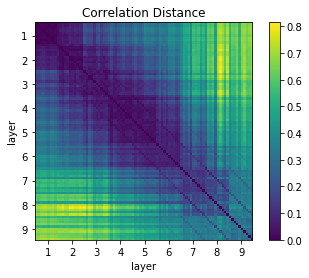

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.title('Correlation Distance')
plt.xlabel('layer')
plt.xticks(ticks=[5, 15, 25, 35, 45, 55, 65, 75, 85],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.yticks(ticks=[5, 15, 25, 35, 45, 55, 65, 75, 85],
           labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('layer')

plt.imshow(correlations_distance)
plt.colorbar()

In [12]:
from sklearn.manifold import MDS

In [47]:
embedding = MDS(n_components=2, dissimilarity='precomputed')

X_transformed = embedding.fit_transform(correlations_distance)

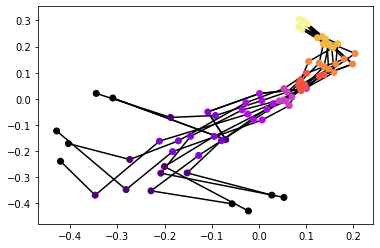

In [49]:
colors = ['#f5f59d', '#f5b642', '#f58742', '#f55442', '#c940c5',
          '#b407ed', '#7d09d6', '#50017a', '#000000']
plt.plot(X_transformed[::10, 0], X_transformed[::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[1::10, 0], X_transformed[1::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[2::10, 0], X_transformed[2::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[3::10, 0], X_transformed[3::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[4::10, 0], X_transformed[4::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[5::10, 0], X_transformed[5::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[6::10, 0], X_transformed[6::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[7::10, 0], X_transformed[7::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[8::10, 0], X_transformed[8::10, 1], linestyle='-', color='black', zorder=1)
plt.plot(X_transformed[::10, 0], X_transformed[::10, 1], linestyle='-', color='black', zorder=1)

plt.scatter(X_transformed[::10, 0], X_transformed[::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[1::10, 0], X_transformed[1::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[2::10, 0], X_transformed[2::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[3::10, 0], X_transformed[3::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[4::10, 0], X_transformed[4::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[5::10, 0], X_transformed[5::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[6::10, 0], X_transformed[6::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[7::10, 0], X_transformed[7::10, 1], marker='o', color=colors, zorder=2)
plt.scatter(X_transformed[8::10, 0], X_transformed[8::10, 1], marker='o', color=colors, zorder=2)


In [8]:
# Get RDMs again
'''
RSA: Create an RDM for each activation layer (90 total) and get correlations between pairings of RDMs
'''
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten
from scipy.stats import pearsonr, spearmanr

# Function to correlate 2 RDMs
def correlate(RDM_1, RDM_2):
    print('Making correlations...')
    assert len(RDM_1) == len(RDM_2)
    num_unique_entries = 499500 # for 1000x1000
    arr_1 = np.empty((num_unique_entries))
    arr_2 = np.empty((num_unique_entries))
    counter = 0
    # first flatten all the relevant values
    for i in range(len(RDM_1)): #1000
        for j in range(i + 1, len(RDM_1)):
            arr_1[counter] = RDM_1[i, j]
            arr_2[counter] = RDM_2[i, j]
            counter += 1
    # Get Pearson correlation
    return pearsonr(arr_1, arr_2)[0]


num_images = len(x_predict) # 1000
RDM_list = np.empty((90, 1000, 1000)) #layer * instance, images, images
# Loop through network instances
for i in range(10):
    print('Working on model', str(i))
    K.clear_session()
    full_model = load_model('Models/Primary/Version_1/all_cnn_c_' + str(i) + '.h5')
    inp = full_model.input
    # Loop through layers
    for j in range(0, 9):
        print('Layer', str(j))
        out = full_model.layers[j].output
        # Flatten representation if needed
        if len(out.shape) != 2:
            out = Flatten()(out)
        temp_model = Model(inputs=inp, outputs=out)
        # Predict on x_predict, transpose for spearman
        print('Getting representation...')
        representations = temp_model.predict(x_predict).T
        print(representations.shape)
        print('Getting RDM...')
        RDM_list[10 * j + i] = spearmanr(representations, representations)[0][:num_images, :num_images]

Working on model 0


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory